In [122]:
import pandas as pd
from mutil import *
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datasets

In [106]:
df_delitos, df_camaras = load_data()
df_delitos = preprocess_data(df_delitos, df_camaras)
df_delitos = df_delitos.groupby('id_camara')

In [107]:
""" 
# Find group with most data
max_len = 0
max_id = 0
for id_camara, df in df_delitos:
	if len(df) > max_len:
		max_len = len(df)
		max_id = id_camara

print(max_id, max_len) 
"""

' \n# Find group with most data\nmax_len = 0\nmax_id = 0\nfor id_camara, df in df_delitos:\n\tif len(df) > max_len:\n\t\tmax_len = len(df)\n\t\tmax_id = id_camara\n\nprint(max_id, max_len) \n'

In [108]:
# get group by '1'
df_delitos = df_delitos.get_group('MC3857')
print(len(df_delitos))
df_delitos.head()


284


,fecha_creacion,hora_creacion,incidente_c4,colonia,delegacion_inicio,sector_inicio,latitud,longitud,año_creacion,mes_creacion,dia_creacion,dia_semana,semana_creacion,id_camara
208560,2022-04-05,17:00,Agresión-Persona,BUENAVISTA,CUAUHTEMOC,BUENAVISTA,19.444291,-99.153146,2022,4,5,1,14,MC3857
208561,2022-04-05,14:00,Robo-Establecimiento sin Violencia,BUENAVISTA,CUAUHTEMOC,BUENAVISTA,19.444400,-99.153800,2022,4,5,1,14,MC3857
208562,2022-04-06,21:00,Robo-Establecimiento sin Violencia,BUENAVISTA,CUAUHTEMOC,BUENAVISTA,19.444432,-99.153957,2022,4,6,2,14,MC3857
208563,2022-04-10,15:00,Robo-Establecimiento sin Violencia,BUENAVISTA,CUAUHTEMOC,BUENAVISTA,19.444426,-99.153890,2022,4,10,6,14,MC3857
208564,2022-04-10,04:00,Robo-Transeúnte,BUENAVISTA,CUAUHTEMOC,BUENAVISTA,19.444432,-99.153957,2022,4,10,6,14,MC3857


In [109]:
#split the data into train (whole dates in 2022) and test (whole dates in 2023)
train = df_delitos[df_delitos.fecha_creacion.dt.year == 2022]
test = df_delitos[df_delitos.fecha_creacion.dt.year == 2023]

# Count the number of crimes per day but saving the date and the id_camara
df_delitos_train_count = train.groupby(['id_camara', 'fecha_creacion']).size().reset_index(name='count')
# df_delitos_train_count.head()

# Count the number of crimes per day but saving the date and the id_camara
df_delitos_test_count = test.groupby(['id_camara', 'fecha_creacion']).size().reset_index(name='count')
# df_delitos_test_count.head()

print(f'Number of observations in train: {len(train)} ({(len(train)*100/len(df_delitos)):.2f})%')
print(f'Number of observations in test: {len(test)} ({(len(test)*100/len(df_delitos)):.2f})%')

Number of observations in train: 274 (96.48)%
Number of observations in test: 10 (3.52)%


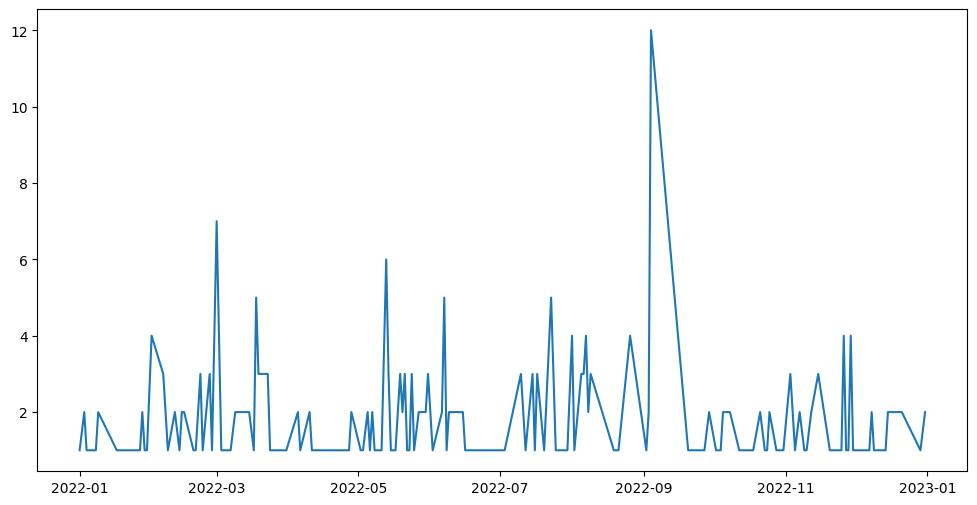

In [118]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df_delitos_train_count['fecha_creacion'], df_delitos_train_count['count'], label='Train')
plt.show()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=675.941, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=624.133, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.54 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=640.494, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=615.912, Time=0.25 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.85 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=646.454, Time=0.17 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=589.407, Time=0.30 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=599.693, Time=0.12 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=2.16 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.78 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=584.668, Time=0.37 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=595.823, Time=

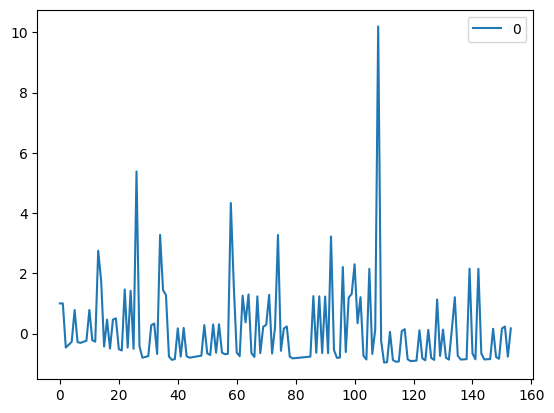

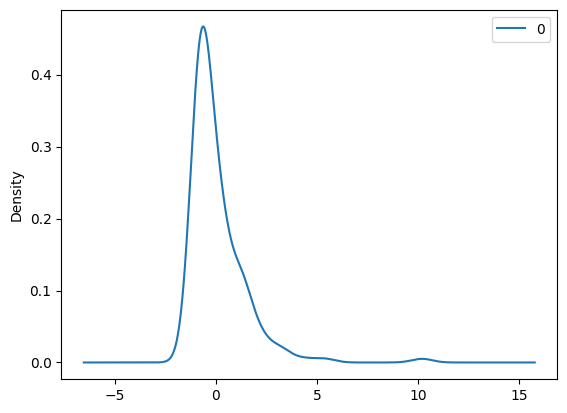

                0
count  154.000000
mean     0.089773
std      1.397298
min     -0.960834
25%     -0.775316
50%     -0.501976
75%      0.341114
max     10.196903


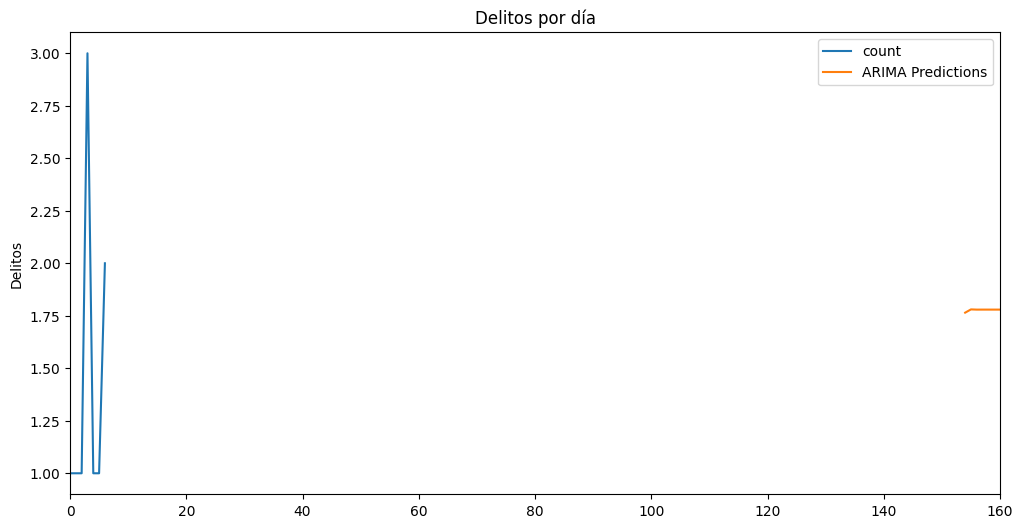

RMSE Error: 0.8066425450969037


In [123]:
# Análisis estádistico utilizando ARIMA

# To install pmdarima use conda install -c conda-forge pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

#Use auto_arima to find the best parameters for the model
stepwise_fit = auto_arima(df_delitos_train_count['count'], start_p=1, start_q=1,
						  max_p=3, max_q=3, m=12,
						  start_P=0, seasonal=True,
						  d=1, D=1, trace=True,
						  error_action='ignore',
						  suppress_warnings=True,
						  stepwise=True)

# Print the summary
stepwise_fit.summary()

# Split the data into train and test
train = df_delitos_train_count['count']
test = df_delitos_test_count['count']

# Fit the model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Plot the residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# Plot the density of the residuals
residuals.plot(kind='kde')
plt.show()

# Print the summary statistics of the residuals
print(residuals.describe())

# Make predictions
predictions = model_fit.predict(len(train), len(train) + len(test) - 1, typ='levels').rename('ARIMA Predictions')

# Plot the predictions for validation set
title = 'Delitos por día'
ylabel='Delitos'
xlabel=''
ax = test.plot(legend=True, figsize=(12,6), title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()

# Evaluate the model
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

error = rmse(test, predictions)
print(f'RMSE Error: {error}')

In [ ]:
# Análisis estádistico utilizando ARIMA

# To install statsmodels use conda install -c conda-forge statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
# To install pmdarima use conda install -c conda-forge pmdarima
from pmdarima import auto_arima 

df_by_delitos = df.groupby('incidente_c4')

for delito, delito_df in df_by_delitos:
	print('delito', delito)

	delito_df_pt = delito_df.groupby('fecha_creacion').count()#['incidente_c4'].to_frame()
	delito_df_pt.rename(columns={'incidente_c4':'obs'}, inplace=True)
	delito_arima_df = delito_df_pt[['obs']]
	print('delito_df_pt', delito_arima_df)
	#print('columns', delito_df_pt.columns)

	#find if one day is missing and print it
	for i in range(len(delito_arima_df)-1):
		if delito_arima_df.index[i+1] - delito_arima_df.index[i] != pd.Timedelta(days=1):
			print('Missing day', delito_arima_df.index[i+1])
			# add missing day
			
			delito_arima_df.loc[delito_arima_df.index[i+1]] = 0
	
	# Create time series and plot
	RT = delito_arima_df.iloc[-678:].astype(float).squeeze().to_numpy()
	RT = pd.Series(RT, index=pd.date_range(start='2022-01-01', end='2022-12-31', freq='D'))
	plt.plot(RT)

In [ ]:
# To install statsmodels use conda install -c conda-forge statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
# To install pmdarima use conda install -c conda-forge pmdarima
from pmdarima import auto_arima 

# Read RDS file
echoT = pd.read_pickle("C:/Users/lpenac/Documents/SUPERBASES/echo_TOTAL.Rds")

# Filter and group data
RoboTranseunte = (
    echoT.loc[echoT['incidente_c4'] == 'Robo-Transeúnte']
        .groupby(['fecha_cierre', 'incidente_c4'])
        .count()
        .reset_index()
        .drop('incidente_c4', axis=1)
)

# Create date range and join with grouped data
date_range = pd.DataFrame({'fecha_cierre': pd.date_range(start='2021-01-01', end='2023-01-30', freq='D')})
Rob = pd.merge(date_range, RoboTranseunte, on='fecha_cierre', how='left')
Rob.fillna(0, inplace=True)
Rob.rename(columns={'n': 'obs'}, inplace=True)
Rob = Rob.drop('fecha_cierre', axis=1)

# Create time series and plot
RT = Rob.iloc[-678:].astype(float).squeeze().to_numpy()
RT = pd.Series(RT, index=pd.date_range(start='2021-03-01', end='2023-01-30', freq='D'))
plt.plot(RT)

# ADF test
result = adfuller(RT)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Plot ACF and PACF
plot_acf(RT, lags=365)
plot_pacf(RT, lags=365)

# Model 1
model1 = ARIMA(RT, order=(1, 0, 1))
model1 = model1.fit()
print(model1.summary())
residuals = model1.resid

# Model 2
model2 = ARIMA(RT, order=(7, 0, 7))
model2 = model2.fit()
print(model2.summary())
residuals = model2.resid

# Forecast with Model 2
forecast = model2.forecast(steps=5)
print(forecast)

# Auto ARIMA
auto = auto_arima(RT, seasonal=False, suppress_warnings=True)
print(auto.summary())

# Model 3
model3 = ARIMA(RT, order=auto.order)
model3 = model3.fit()
print(model3.summary())
residuals = model3
